# IT5005 Artificial Intelligence Term Assignment

Fill your name and student number below:


| Student Number: | Name:                   |
|:----------------|:------------------------|
| A0286970M      | Wu Xiangjiekang           |




## 1. Introduction

In this assignment we hope to achieve the following:

    1. An understanding of the practical limitations of using dense networks in complex tasks
    2. Hands-on experience in building a deep learning neural network to solve a relatively complex task.
    
As this lab is more challenging than the tutorial, you can choose to work in teams of 2.

Each step may take a long time to run. You and your partner may want to work out how to do things simultaneously, but please do not miss out on any learning opportunities.


## 2. Submission Instructions


### 2.1 SUBMISSION INSTRUCTIONS

#### If you are working with a partner only ONE submission is required. However please ensure that both names are shown above. Otherwise one person will not get any marks.

Please rename this Jupyter notebook to your student ID (e.g. A1234567Y.ipynb), complete it and submit to Canvas by 12 pm, Sunday 21 April 2024.

The folder will close shortly after 12 pm on 21 April, after which you will no longer be able to submit your assignment and you will get 0.


## 3. Creating a Dense Network for CIFAR-10

We will now begin building a neural network for the CIFAR-10 dataset. The CIFAR-10 dataset consists of 50,000 32x32x3 (32x32 pixels, RGB channels) training images and 10,000 testing images (also 32x32x3), divided into the following 10 categories:

    1. Airplane
    2. Automobile
    3. Bird
    4. Cat
    5. Deer
    6. Dog
    7. Frog
    8. Horse
    9. Ship
    10. Truck
    
In the first two parts of this lab we will create a classifier for the CIFAR-10 dataset.

### 3.1 Loading the Dataset

We begin firstly by creating a Dense neural network for CIFAR-10. The code below shows how we load the CIFAR-10 dataset:


In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

def load_cifar10():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
    test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_x /= 255.0
    test_x /= 255.0
    ret_train_y = to_categorical(train_y,10)
    ret_test_y = to_categorical(test_y, 10)
    
    return (train_x, ret_train_y), (test_x, ret_test_y)


(train_x, train_y), (test_x, test_y) = load_cifar10()

----

#### Question 1

Explain what the following two  statements do, and where the number "3072" came from (2 MARKS):

```
  train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
  test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
```

***ANSWER: The number "3072" comes from the dimensions of the images in the CIFAR-10 dataset, each dimension is multiplied: 32 pixels (width) x 32 pixels (height) x 3 color channels = 3072.**

*FOR GRADER: _______ / 2*

### 3.2 Building the MLP Classifier

In the code box below, create a new fully connected (dense) multilayer perceptron classifier for the CIFAR-10 dataset. To begin with, create a network with one hidden layer of 1024 neurons, using the SGD optimizer. You should output the training and validation accuracy at every epoch, and train for 50 epochs:


Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8531 - accuracy: 0.3389 - val_loss: 1.7663 - val_accuracy: 0.3714
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6737 - accuracy: 0.4121 - val_loss: 1.6823 - val_accuracy: 0.4008
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5967 - accuracy: 0.4405 - val_loss: 1.5999 - val_accuracy: 0.4280
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5417 - accuracy: 0.4622 - val_loss: 1.5240 - val_accuracy: 0.4637
Epoch 5/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5007 - accuracy: 0.4760 - val_loss: 1.5746 - val_accuracy: 0.4473
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4651 - accuracy: 0.4909 - val_loss: 1.5850 - val_accuracy: 0.4395
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4323 - accuracy: 0.5002 - val_loss: 1.480

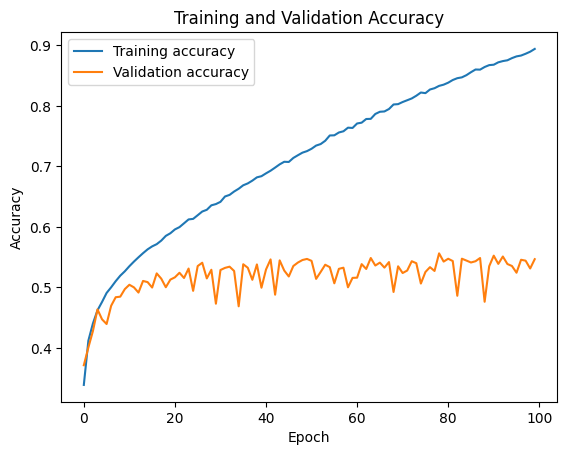

In [4]:
""" 
Write your code to build an MLP with one hidden layer of 1024 neurons,
with an SGD optimizer. Train for 100 epochs, and output the training and
validation accuracy at each epoch.
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Create the MLP model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(3072,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=100, batch_size=32, 
                    validation_data=(test_x, test_y), verbose=1)

# Output training and validation accuracy at each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Question 2

Complete the following table on the design choices for your MLP 
(3 MARKS):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | SGD         | Specified in question |
| # of hidden layers   | 1           | Specified in question |
| # of hidden neurons  | 1024        | Specified in question |
| Hid layer activation | ReLU            | Helps avoid vanishing gradient problems and speeds up training.                      |
| # of output neurons  | 10            | Matches the number of classes in CIFAR-10 dataset.                      |
| Output activation    | Softmax            | Softmax is suitable for multi-class classification, providing probabilities for each class.                      |
| learning_rate        | Default of SGD 0.01           | Typical choice for initial experiments;                      |
| momentum             | Default of SGD 0.0           | Momentum is not altered unless specified; helps in faster convergence.                      |
| decay                | Default of SGD 0.0           | Learning rate decay not specified; it would help in stabilizing learning as training progresses.                      |
| loss                 | Categorical Crossentropy            | Suitable for multi-class classification problems where classes are mutually exclusive.                      |

*For TA: ___ / 3* <br>
*Code:  ____/ 5* <br>
**TOTAL: ____ / 8** <br>

#### Question 3:

What was your final training accuracy? Validation accuracy? Is there overfitting / underfitting? Explain your answer (5 MARKS)

***The model exhibits overfitting, as evidenced by a high training accuracy of 89.42% and a significantly lower validation accuracy of 54.67% after 100 epochs. While the model effectively learns the training data, the substantial gap between training and validation performance indicates it does not generalize well to new data.***

*FOR GRADER: ______ / 5*

### 3.3 Experimenting with the MLP

Cut and paste your code from Section 3.2 to the box below (you may need to rename your MLP). Experiment with the number of hidden layers, the number of neurons in each hidden layer, the optimization algorithm, etc. See [Keras Optimizers](https://keras.io/optimizers) for the types of optimizers and their parameters. **Train for 100 epochs.**


In [13]:
"""
Cut and paste your code from Section 3.2 below, then modify it to get
much better results than what you had earlier. E.g. increase the number of
nodes in the hidden layer, increase the number of hidden layers,
change the optimizer, etc. 

Train for 100 epochs.

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create the MLP model with reduced dropout
model = Sequential([
    Dense(2048, activation='relu', input_shape=(3072,)),
    Dropout(0.2),  # Reduced dropout rate
    Dense(1024, activation='relu'),
    Dropout(0.2),  # Reduced dropout rate
    Dense(512, activation='relu'),
    Dropout(0.2),  # Reduced dropout rate
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Adjusted learning rate
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with EarlyStopping callback
history = model.fit(train_x, train_y, epochs=100, batch_size=64,
                    validation_data=(test_x, test_y),
                    verbose=1, callbacks=[early_stopping])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
122/782 [===>..........................] - ETA: 29s - loss: 2.2420 - accuracy: 0.1775

KeyboardInterrupt: 

Epoch 1/100
782/782 [==============================] - 36s 45ms/step - loss: 1.9209 - accuracy: 0.3381 - val_loss: 2.1279 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 35s 45ms/step - loss: 1.6728 - accuracy: 0.4055 - val_loss: 1.8582 - val_accuracy: 0.3445 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 36s 46ms/step - loss: 1.5948 - accuracy: 0.4306 - val_loss: 1.7486 - val_accuracy: 0.3578 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 36s 46ms/step - loss: 1.5356 - accuracy: 0.4505 - val_loss: 1.7780 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 35s 45ms/step - loss: 1.4952 - accuracy: 0.4655 - val_loss: 1.4889 - val_accuracy: 0.4738 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 36s 46ms/step - loss: 1.4685 - accuracy: 0.4753 - val_loss: 1.6106 - val_accuracy: 0.4158 - lr: 0.0010
Epoch 7/100
782/782 [==============================]

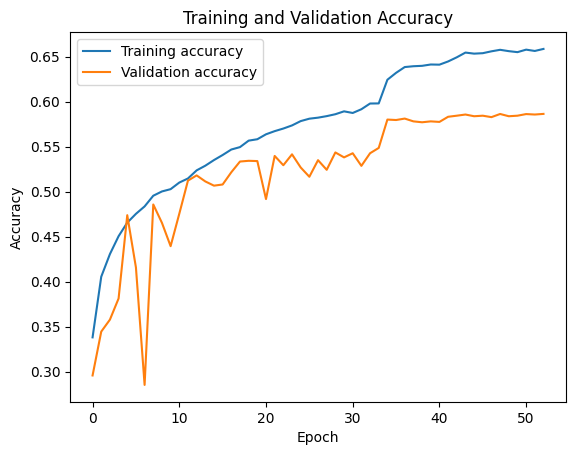

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Create the MLP model with Batch Normalization
model = Sequential([
    Dense(2048, input_shape=(3072,), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(train_x, train_y, epochs=100, batch_size=64,
                    validation_data=(test_x, test_y),
                    verbose=1, callbacks=[early_stopping, reduce_lr])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


----

#### Question 4:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the learning_rate, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (3 MARKS)


| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | Adam            |  Generally more efficient than SGD as it adjusts the learning rate per parameter, leading to faster convergence.                      |
| # of hidden layers   | 3            | Increased to 3 to enable the model to learn more complex patterns and deeper representations in the data.                      |
| # neurons(layer1)    | 2048            | A higher number of neurons allows the network to capture more complex features at the initial layer.                      |
| Hid layer1 activation| ReLU            | ReLU is effective at avoiding vanishing gradient issues and speeds up the training process.                      |
| # neurons(layer2)    | 1024             | Provides substantial capacity for learning and managing complexity after initial data transformations.                      |
| Hid layer2 activation| ReLU            | Consistency in activation to maintain effective gradient flow through the network.                      |
| # neurons(layer3)    | 512             | Complements deeper layers by focusing on progressively refined features.                      |
| Hid layer3 activation| ReLU            | Maintains non-linearity and efficient learning through depth.                      |
| # of output neurons  | 10            | Corresponds to the 10 class labels in CIFAR-10, needed for multi-class classification.                      |
| Output activation    | Softmax           | Softmax is used for multi-class classification to output a probability distribution over classes.                      |
| learning_rate        | 0.001            | Selected to provide a good balance between speed and stability of learning.                      |
| loss                 | Categorical Crossentropy            | Appropriate for problems where each class is exclusive and probabilities need to sum to one.                      |

*FOR GRADER: _____ / 3 * <br>
*CODE: ______ / 5 *<br>

***TOTAL: ______ / 8***

#### Question 5

What is the final training and validation accuracy that you obtained after 100 epochs? Is there considerable improvement over Section 3.2? Are there still signs of underfitting or overfitting? Explain your answer (5 MARKS)

***Write your answers here***

*FOR GRADER: ______ / 5 *

#### Question 6

Write a short reflection on the practical difficulties of using a dense MLP to classsify images in the CIFAR-10 datasets. (3 MARKS)

***Write your answers here***

*FOR GRADER: _______ /3*

----

## 4. Creating a CNN for the MNIST Data Set

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in the previous lab. Let's go through each part to see how to do this.

### 4.1 Loading the MNIST Dataset

As always we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_mnist():
    (train_x, train_y),(test_x, test_y) = mnist.load_data()
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

    train_x=train_x.astype('float32')
    test_x = test_x.astype('float32')
    
    train_x /= 255.0
    test_x /= 255.0
        
    train_y = to_categorical(train_y, 10)
    test_y = to_categorical(test_y, 10)
        
    return (train_x, train_y), (test_x, test_y) 

### 4.2 Building the CNN

We will now build the CNN. Unlike before we will create a function to produce the CNN. We will also look at how to save and load Keras models using "checkpoints", particularly "ModelCheckpoint" that saves the model each epoch.

Let's begin by creating the model. We call os.path.exists to see if a model file exists, and call "load_model" if it does. Otherwise we create a new model.



In [2]:
# load_model loads a model from a hd5 file.
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os

MODEL_NAME = 'mnist-cnn.hd5'

def buildmodel(model_name):
    if os.path.exists(model_name):
        model = load_model(model_name)                                                                                             
    else:
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7

        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))
        model.add(Flatten()) # Question 9
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(10, activation='softmax'))

    return model



----

#### Question 7

The first layer in our CNN is a 2D convolution kernel, shown here:

```
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7
```

Why is the input_shape set to (28, 28, 1)? What does this mean? What does "padding = 'same'" mean? (4 MARKS)

***Write your answer here***

*FOR GRADER: ______ / 4*

#### Question 8

The second layer is the MaxPooling2D layer shown below:

```
        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
```

What other types of pooling layers are available? What does 'strides = 2' mean? (3 MARKS)

***Write your answer here***

*FOR GRADER: _____ / 3*


#### Question 9

What does the "Flatten" layer here do? Why is it needed?

```
        model.add(Flatten()) # Question 9
```

***Write your answer here***

*FOR GRADER: ____ / 2*




----

### 4.3 Training the CNN

Let's now train the CNN. In this example we introduce the idea of a "callback", which is a routine that Keras calls at the end of each epoch. Specifically we look at two callbacks:

    1. ModelCheckpoint: When called, Keras saves the model to the specified filename.
    
    2. EarlyStopping: When called, Keras checks if it should stop the training prematurely.
    

Let's look at the code to see how training is done, and how callbacks are used.

In [3]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train(model, train_x, train_y, epochs, test_x, test_y, model_name):

    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.7), 
                  loss='categorical_crossentropy', metrics=['accuracy'])

    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10

    print("Starting training.")

    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])

    print("Done. Now evaluating.")
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

Notice that there isn't very much that is unusual going on; we compile the model with our loss function and optimizer, then call fit, and finally evaluate to look at the final accuracy for the test set.  The only thing unusual is the "callbacks" parameter here in the fit function call

```
    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])
```

----

#### Question 10.

What does do the min_delta and patience parameters do in the EarlyStopping callback, as shown below? (2 MARKS)

```
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10
```

---

### 4.4 Putting it together.

Now let's run the code and see how it goes (Note: To save time we are training for only 5 epochs; we should train much longer to get much better results):

In [4]:
    (train_x, train_y),(test_x, test_y) = load_mnist()
    model = buildmodel(MODEL_NAME)
    train(model, train_x, train_y, 5, test_x, test_y, MODEL_NAME)
    

Starting training.
Epoch 1/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9935INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9948INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 3/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9961INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 4/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9963INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0268 - val_accuracy: 0.9917
Epoch 5/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9977INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0324 - val_accuracy: 0.9912
Done. Now evaluating.
313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9912
Test accuracy: 0.99, loss: 0.03


----

#### Question 11.

Compare the relative advantages and disadvantages of CNN vs. the Dense MLP that you build in sections 3.2 and 3.3. What makes CNNs better (or worse)? (3 MARKS)

***Type your answers here***

*FOR TA: ______ / 3*

## 5. Making a CNN for the CIFAR-10 Dataset

Now comes the fun part: Using the example above for creating a CNN for the MNIST dataset, now create a CNN in the box below for the MNIST-10 dataset. At the end of each epoch save the model to a file called "cifar.hd5" (note: the .hd5 is added automatically for you).

---

#### Question 12.

Summarize your design in the table below (the actual coding cell comes after this):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |             |                       |
| Input shape          |             |                       |
| First layer          |             |                       |
| Second layer         |             |                       |
| Add more layers      |             |                       |
| if needed            |             |                       |
| Dense layer          |             |                       |


*FOR TA:*
*Table: ________ / 3* <br>
*Code: _________/ 7* <br>
**TOTAL: _______ / 10** <br>

---

***TOTAL: _______ / 55***

In [ ]:
"""
Write your code for your CNN for the CIFAR-10 dataset here. 

Note: train_x, train_y, test_x, test_y were changed when we called 
load_mnist in the previous section. You will now need to call load_cifar10
again.

"""
